## Тема “Обучение без учителя”
### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# Настройка формата вывода чисел float
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Загрузим датасет Boston, возпользовались  подсказкой на сайте https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# Название фичей
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Преобразуем его в датафрейм
X = pd.DataFrame(data, columns=feature_names)
# Таргет
y = pd.DataFrame(target, columns=['price'])

In [30]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [5]:
# Информация о размере датафрейма
X.shape

(506, 13)

In [6]:
# Посчитаем пропущенные значения
X.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [31]:
# Посмотрим статистику
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [32]:
# Посмотрим статистику
y.describe()

,price
count,506.00
mean,22.53
std,9.20
min,5.00
25%,17.02
50%,21.20
75%,25.00
max,50.00


In [10]:
# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабирование данных с помощью StandardScaler:

In [23]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames)


In [33]:
X_train_scaled.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.29,-0.50,1.03,-0.28,0.49,-1.43,1.03,-0.80,1.71,1.58,0.85,-0.07,1.75
1,-0.34,-0.50,-0.41,-0.28,-0.16,-0.68,-0.43,0.32,-0.62,-0.58,1.20,0.43,-0.56
2,-0.40,1.01,-0.72,-0.28,-1.01,-0.40,-1.62,1.33,-0.97,-0.60,-0.64,0.07,-0.65


In [34]:
# Посмотрим статистику по X_train_scaled
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.50,-1.49,-0.28,-1.46,-3.46,-2.35,-1.26,-0.97,-1.31,-2.57,-3.89,-1.51
25%,-0.40,-0.50,-0.85,-0.28,-0.89,-0.60,-0.82,-0.81,-0.62,-0.75,-0.68,0.21,-0.80
50%,-0.38,-0.50,-0.35,-0.28,-0.16,-0.15,0.33,-0.30,-0.51,-0.45,0.17,0.38,-0.22
75%,-0.05,0.36,1.03,-0.28,0.63,0.45,0.90,0.75,0.31,1.58,0.85,0.43,0.55
max,9.63,3.82,2.43,3.60,2.68,3.48,1.12,3.91,1.71,1.85,1.65,0.44,3.59


In [35]:
# Посмотрим статистику по X_test_scaled
X_test_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.00,-0.04,0.11,-0.05,-0.08,-0.22,0.00,-0.03,0.11,0.13,0.31,0.02,0.14
std,0.84,1.04,0.98,0.92,0.92,0.94,1.03,0.94,1.07,1.07,0.81,0.99,1.02
min,-0.41,-0.50,-1.53,-0.28,-1.40,-3.89,-2.23,-1.24,-0.97,-1.30,-2.39,-3.82,-1.35
25%,-0.40,-0.50,-0.71,-0.28,-0.92,-0.63,-0.89,-0.73,-0.62,-0.74,0.04,0.20,-0.67
50%,-0.38,-0.50,-0.06,-0.28,-0.21,-0.21,0.22,-0.21,-0.51,-0.36,0.40,0.39,-0.02
75%,0.10,-0.50,1.03,-0.28,0.55,0.23,0.95,0.45,1.71,1.58,0.85,0.44,0.78
max,4.75,3.61,2.43,3.60,2.68,2.42,1.12,3.24,1.71,1.85,1.65,0.44,3.45


Построение модели TSNE и диаграммы рассеяния:

In [37]:
# Построение модели TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

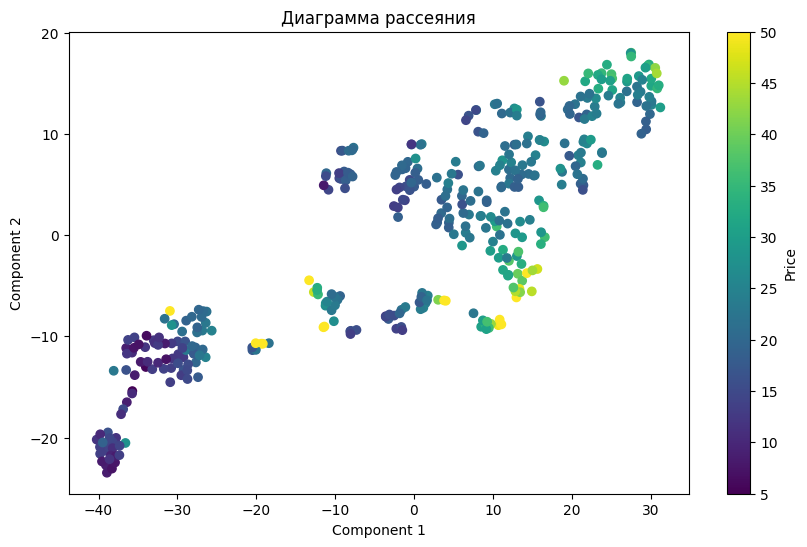

In [40]:
# Преобразуем y_train в массив
y_train_array = y_train.values  

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_array, cmap='viridis')
plt.colorbar(label='Price')
plt.title('Диаграмма рассеяния')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [41]:
from sklearn.cluster import KMeans

In [49]:
# Кластеризация данных с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train_scaled)
clusters_train = kmeans.predict(X_train_scaled)

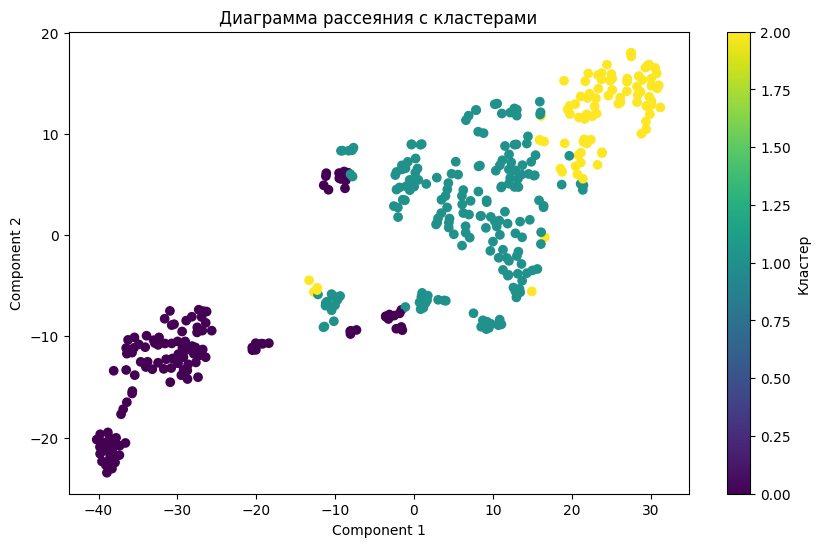

In [45]:
# Построем диаграмму рассеяния с кластерами
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters_train, cmap='viridis')
plt.colorbar(label='Кластер')
plt.title('Диаграмма рассеяния с кластерами')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [51]:
# Создадим датафрейм с кластерами
X_train_copy = pd.concat([X_train, y_train], axis=1)
X_train_copy['cluster'] = clusters_train

In [54]:
# Посмотрим среднюю цену и криминальность в зависимости от кластера, а также количество домов в каждом кластере
cluster_summary_train = X_train_copy.groupby('cluster').agg({
    "price": "mean", 
    "CRIM": "mean", 
    "NOX": "count"
}).sort_values(by="CRIM")
cluster_summary_train

,price,CRIM,NOX
cluster,,,
2,27.79,0.07,86
1,24.96,0.42,191
0,16.17,10.80,127


Вывод: Кластеры демонстрируют четкую зависимость между уровнем цен на жилье и уровнем криминальности. Чем ниже уровень криминальности, тем выше цена на жилье, что подтверждает типичные экономические и социальные закономерности.

### *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [55]:
# Применяем модель KMeans к тестовым данным
clusters_test = kmeans.predict(X_test_scaled)

In [57]:
# Создадим датафрейм с кластерами
X_test_copy = pd.concat([X_test, y_test], axis=1)
X_test_copy['cluster'] = clusters_test

In [58]:
# Посмотрим среднею цену и криминальность в зависимости от кластера, а также количество домов в каждом кластере
cluster_summary_test = X_test_copy.groupby('cluster').agg({
    "price": "mean", 
    "CRIM": "mean", 
    "NOX": "count"
}).sort_values(by="CRIM")
cluster_summary_test

,price,CRIM,NOX
cluster,,,
2,31.35,0.06,16
1,21.86,0.27,51
0,16.44,10.17,35


Вывод: Кластеры четко демонстрируют связь между ценой на жилье и уровнем криминальности. Кластер 2 представлен элитными районами с низкой криминальностью и высокими ценами. Кластер 1 включает более доступные, но все еще благополучные районы. Кластер 0 объединяет дома в неблагополучных районах с высокой криминальностью и низкими ценами на жилье.